<a href="https://colab.research.google.com/github/Abhiram-k1/Elevate-Labs-AI-ML-Internship/blob/main/Elevate_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Data Preprocessing ---
Dataset after preprocessing (first 5 rows):
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667         1          0   
1  0.909091  0.502405       0.6   1.000000  1.000000         1          0   
2  0.909091  0.571134       0.4   0.333333  0.333333         1          0   
3  0.906061  0.402062       0.6   0.333333  0.333333         1          0   
4  0.836364  0.396564       0.6   0.000000  0.333333         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  0.666667         1   
1         0                0                1  1.000000         0   
2         1                0                0  0.666667         1   
3         1                0                1  1.000000         1   
4         1                0                1  0.666667         0   

   semi-furnished  unfurnished  
0              

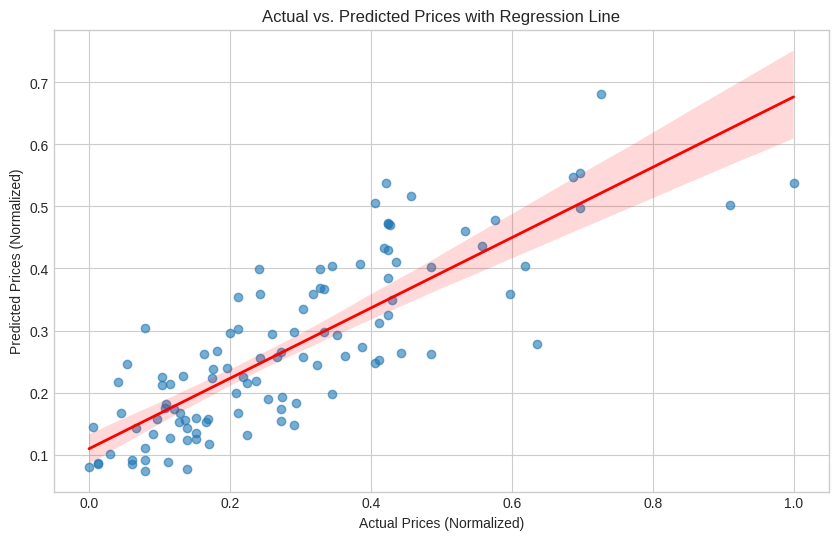

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# --- 1. Import and Preprocess the Dataset ---
print("--- 1. Data Preprocessing ---")
df = pd.read_csv('Housing.csv')

# Convert binary categorical variables ('yes'/'no') to numeric (1/0)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Apply one-hot encoding to the 'furnishingstatus' column
furnishing_status_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True, dtype=int)
df = pd.concat([df, furnishing_status_dummies], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True)

# Feature Scaling - Normalizing the data
scaler = MinMaxScaler()
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


print("Dataset after preprocessing (first 5 rows):")
print(df.head())
print("\n")

# --- 2. Split Data into Train-Test Sets ---
print("--- 2. Splitting Data ---")
# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\n")


# --- 3. Fit a Linear Regression Model ---
print("--- 3. Training the Model ---")
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")
print("\n")


# --- 4. Evaluate the Model ---
print("--- 4. Model Evaluation ---")
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print("\n")


# --- 5. Plot Regression Line and Interpret Coefficients ---
print("--- 5. Visualization and Interpretation ---")

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'linewidth':2})
plt.xlabel("Actual Prices (Normalized)")
plt.ylabel("Predicted Prices (Normalized)")
plt.title("Actual vs. Predicted Prices with Regression Line")
plt.grid(True)
plt.savefig('regression_plot.png')
print("Saved regression plot to 'regression_plot.png'")

# Display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))